<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lesson + Lab)

***

Week 2 | Lesson 4.1-Alt

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Know what situations **grouping** is useful for
- Explain the **`.groupby()`** feature in Pandas
- Demonstrate aggregation /w plotting methods in Pandas

## Specific Examples When GroupBy is Useful
 - Segmenting customers based on age, buying habbits, interests, behavior
 




- Popularity of movie genres based on ticket sales

 - Sum of crimes given time of day in SF (morning, afternoon, night)

 - Count number of people with the same last name

 - Median number of multi-unit buildings in a region

## What is Grouping?

_(visually)_

![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

![](http://www.omnis.net/support/images/technews/g2msimplebargraph.jpg)

_Think about what this would look like as a summary statistic like mean or sum?_

![](http://stephanieevergreen.com/wp-content/uploads/2013/08/DivergingFinal.png)

_Summary grouped by question and response category_

![](http://zmjones.com/static/posts/titanic-survival-glm.png)

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})
df

,a,b,cat1,cat2
0,0.866300,-0.566525,X,alpha
1,-0.922653,-0.271044,X,beta
2,-0.051206,-2.069396,Y,alpha
3,-0.262556,0.090273,Y,beta
4,-1.213012,0.011564,Z,alpha


**This gives us a specific feature "a", grouped by cat1.** 

_Notice that groups don't really print anything interesting on their own._

In [4]:
group = df['a'].groupby(df['cat1'])
group

**Groups can be operated on in aggregate.**

In [5]:
# mean
group.mean()

cat1
X   -0.028177
Y   -0.156881
Z   -1.213012
Name: a, dtype: float64

In [6]:
# median
group.median()

cat1
X   -0.028177
Y   -0.156881
Z   -1.213012
Name: a, dtype: float64

In [7]:
# sum
group.sum()

cat1
X   -0.056353
Y   -0.313762
Z   -1.213012
Name: a, dtype: float64

**We can use group keys that are series as well**

For example:

In [8]:
#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
df['a'].groupby([cities,month]).mean()

LA  FEB   -0.922653
    JAN   -0.051206
NY  FEB   -0.262556
    JAN   -0.173356
Name: a, dtype: float64

This is an equivelent method for doing the same thing but you will find this to be much more common when dealing with DataFrames.

In [38]:
# adding cites and month to our DataFrame
df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])
df

,class,vals,cities,month
5,class 2,2,NY,JAN
6,class 2,6,LA,FEB
7,class 2,7,LA,JAN
8,class 2,5,NY,FEB
9,class 2,2,NY,JAN


In [39]:
df.groupby(['cities', 'month'])['a'].mean()

KeyError: 'Column not found: a'

## For 1 minute:  Ask your group what would you expect to happen if you didn't specifiy a column / feature label?

In [40]:
# It looks nicer for 1 thing!
df.groupby(['cities', 'month']).mean()

vals
cities month      
LA     FEB       6
       JAN       7
NY     FEB       5
       JAN       2

In [41]:
print df

     class  vals cities month
5  class 2     2     NY   JAN
6  class 2     6     LA   FEB
7  class 2     7     LA   JAN
8  class 2     5     NY   FEB
9  class 2     2     NY   JAN


Grouping by a single variable can be done by specifying a variable key string.

In [42]:
df.groupby('cities').mean()

,vals
cities,
LA,6.5
NY,3.0


In [36]:
df.groupby('cities').count()

KeyError: 'cities'

## 5 mins discuss with your group:  How might you use this in the future?

**Getting Subsets By Index**

Usually, we tell a DataFrame what we want by axis, to get a series.  with groups, we can still select columns, but the way we select subsets is a little different.  We must request them with a method for example:

In [15]:
# Re-init our test data
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})

df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])

df

,a,b,cat1,cat2,cities,month
0,0.129962,0.932816,X,alpha,NY,JAN
1,0.429279,-1.303021,X,beta,LA,FEB
2,0.092052,0.786284,Y,alpha,LA,JAN
3,0.885049,0.296746,Y,beta,NY,FEB
4,0.486911,0.915061,Z,alpha,NY,JAN


In [16]:
# our group by values of cat2, inside of groups by cities
df.groupby(["cities", "cat2"]).size()

cities  cat2 
LA      alpha    1
        beta     1
NY      alpha    2
        beta     1
dtype: int64

In [17]:
# Fetching group subset pairs
my_group = df.groupby(["cities"])
for c in my_group.groups: 
    print c

NY
LA


In [18]:
my_group.get_group('LA')

,a,b,cat1,cat2,cities,month
1,0.429279,-1.303021,X,beta,LA,FEB
2,0.092052,0.786284,Y,alpha,LA,JAN


In [19]:
# Say we want NY only from our subset
my_group.get_group('NY')

,a,b,cat1,cat2,cities,month
0,0.129962,0.932816,X,alpha,NY,JAN
3,0.885049,0.296746,Y,beta,NY,FEB
4,0.486911,0.915061,Z,alpha,NY,JAN


In [20]:
my_group = df.groupby(["cities", "cat2"])
for c in my_group.groups: 
    print c

('NY', 'beta')
('NY', 'alpha')
('LA', 'beta')
('LA', 'alpha')


## 2-5 minutes try to do this with a partner:

 - Make a group object using citites and cat2
 - Select the cities subgroup "NY" with cat2 values "alpha"
 - Use get_group() on your group object, and pass a tuple with 2 values as the parameter
   - The first tuple element is the value you are looking for in "cities" index
   - The 2nd tuple element is the value you are looking for in "cat2"

In [21]:
my_group.get_group(('NY', 'alpha'))

,a,b,cat1,cat2,cities,month
0,0.129962,0.932816,X,alpha,NY,JAN
4,0.486911,0.915061,Z,alpha,NY,JAN


## Explain what happened 

More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

A quick note about two popular aggregates that seem the same, but are not!

.count() vs .size()

In [22]:
# Gives us counts of record rows repeated over variable columns
df.groupby('cities').count()

,a,b,cat1,cat2,month
cities,,,,,
LA,2,2,2,2,2
NY,3,3,3,3,3


In [23]:
# .size gives us counts as series, not repeated values over column variables
df.groupby('cities').size()

cities
LA    2
NY    3
dtype: int64

With a Pandas **group object**, .count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)


In [24]:
# Other group by methods include -- 
# sorry was too pressed for time to manually format this list

groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=[".groupby() aggregate functions"])

,.groupby() aggregate functions
0,filter
1,get_group
2,height
3,last
4,median
5,ngroups
6,plot
7,rank
8,std
9,transform


# (basic) Plotting with Groups


In [25]:
# This is a reminder of what our dataframe looks like
df

,a,b,cat1,cat2,cities,month
0,0.129962,0.932816,X,alpha,NY,JAN
1,0.429279,-1.303021,X,beta,LA,FEB
2,0.092052,0.786284,Y,alpha,LA,JAN
3,0.885049,0.296746,Y,beta,NY,FEB
4,0.486911,0.915061,Z,alpha,NY,JAN


In [26]:
# We want to see the count of alpha + beta values, given cities
df.groupby("cities")['cat2'].count()

cities
LA    2
NY    3
Name: cat2, dtype: int64

In [27]:
df.groupby("cities")['cat2'].count().plot(kind="bar")

## Who remembers how to groupby with more than one variable?

In [43]:
df.groupby(["cities","cat2"]).size().plot(kind="bar")

KeyError: 'cat2'

In [29]:
# Unstack will pull-apart group values for easy display
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar")

In [30]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar", stacked=True)

Bar charts are great for displaying quanitites with groups and understanding qantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

In [31]:
import matplotlib.pyplot as plt

classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [32]:
# This could be labled better but notice we can also plot negative values
df.groupby("cities").plot(kind="barh")

KeyError: 'cities'

In [ ]:
# Here's a plot I made with mysterious code!

## Group Exercise

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [44]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

In [71]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!
ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [78]:
# Solution here
rows = len(ufo['City'])

print rows - ufo['Colors Reported'].isnull().sum()
print rows - ufo['City'].isnull().sum()
print rows - ufo['State'].isnull().sum()
print rows - ufo['Shape Reported'].isnull().sum()
print rows - ufo['Time'].isnull().sum()

17034
80496
80543
72141
80543


### 2. What is the breakdown of dtypes in our dataframe?

In [96]:
# [i.dtype for i in ufo['Colors Reported']]
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [ ]:
# Solution here


### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

In [ ]:
## Change this cell to a "markdown" type cell

### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

/Users/davidswan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(....) is deprecated, use sort_index(.....)


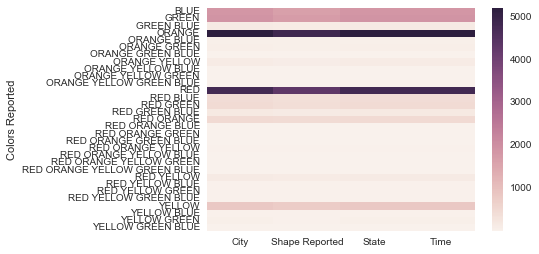

In [135]:
import seaborn as sns
temp = ufo.groupby(['Colors Reported'])
#temp[['Colors Reported']].count().sort('Colors Reported', ascending = False)
# tempCount = temp.count().sort()
# sns.heatmap(tempCount)

### 4. Which shapes are most commonly reported?

In [128]:
pd.DataFrame(ufo).reset_index()

,index,City,Colors Reported,Shape Reported,State,Time
0,0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [139]:
# tempShapes = ufo.groupby(['Shape Reported','Colors Reported'])
# cs = tempShapes.count()
# cs.
# tempShapes[['Shape Reported']].sort('Shape Reported', ascending = False)
ufo.groupby(['Shape Reported', 'Colors Reported']).size().order(ascending = False)


/Users/davidswan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


Shape Reported  Colors Reported         
LIGHT           RED                         1188
                ORANGE                      1122
FIREBALL        ORANGE                       884
CIRCLE          ORANGE                       796
SPHERE          ORANGE                       569
TRIANGLE        RED                          561
CIRCLE          RED                          548
LIGHT           BLUE                         403
                GREEN                        378
FIREBALL        RED                          377
                GREEN                        353
SPHERE          RED                          335
TRIANGLE        ORANGE                       299
OVAL            ORANGE                       236
OTHER           RED                          233
LIGHT           YELLOW                       208
FORMATION       RED                          207
                ORANGE                       206
OTHER           ORANGE                       199
CIRCLE          BLUE        

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

In [142]:
ufo[ufo['Shape Reported'] == 'CIGAR']

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

### 9. Plot counts of sightings per City

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

### 13.  Bonus:  What are the top 20 shapes by City + State?


### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    - Check our Slack for how to accomplish this (dyerrington posted this recently) 
    
There are at least 3 students who have asked how to do this out of personal interest in our class.  Your mission is to seek them out for advice.  No instructors allowed!

In [146]:
ufo['Date'] = pd.to_datetime(ufo['Time'])
ufo['Hour'] = ufo['Date'].map(lambda(Date, Date.hour()))

SyntaxError: invalid syntax (<ipython-input-146-370f92acaa11>, line 2)

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art